<a href="https://colab.research.google.com/github/Krishnachatti/assignments-/blob/main/Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8a123ce1b307193e35bfecae50cbd0cf3fa0ec180a43e6ba083d7755582ce7de
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import zscore
from lifelines import KaplanMeierFitter
from google.colab import files

# Upload your dataset
uploaded = files.upload()

# Load data
df = pd.read_csv("churn.csv")
df.head()


Saving churn.csv to churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check missing values and data types
print(df.info())
print(df.isnull().sum())

# Convert TotalCharges to numeric (if applicable)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


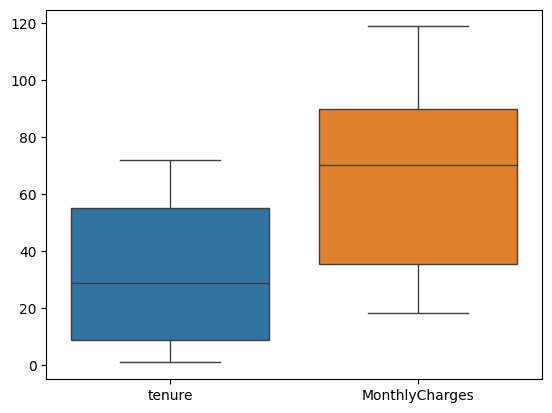

In [ ]:
print(df.describe())
sns.boxplot(data=df[['tenure', 'MonthlyCharges']])
plt.show()


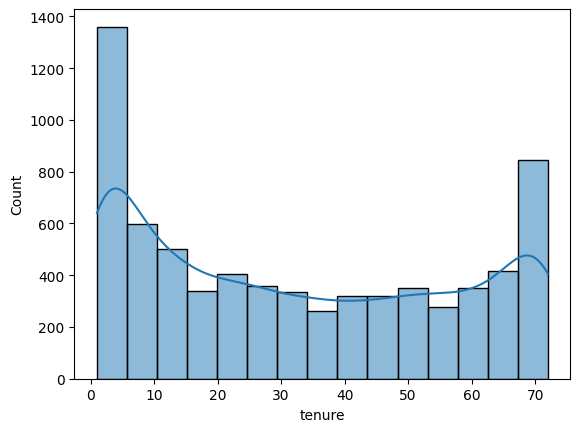

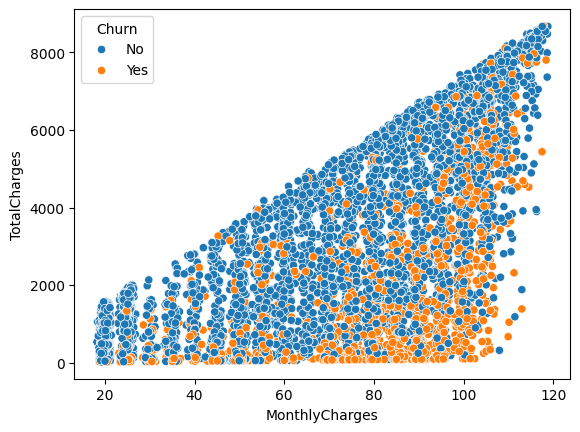

In [ ]:
# Histogram of tenure
sns.histplot(df['tenure'], kde=True)
plt.show()

# Scatter plot
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.show()


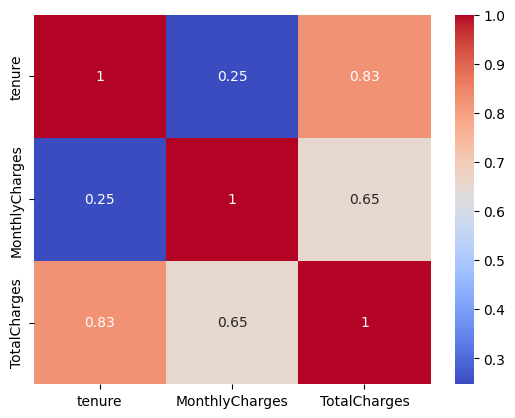

In [ ]:
correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,72], labels=['0-12','12-24','24-48','48-60','60-72'])
df['tenure_monthly'] = df['tenure'] * df['MonthlyCharges']


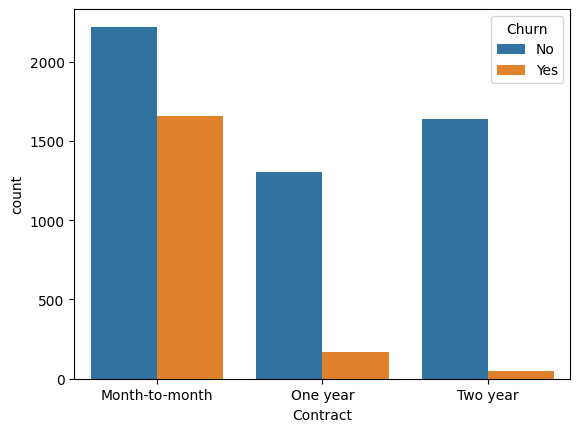

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()


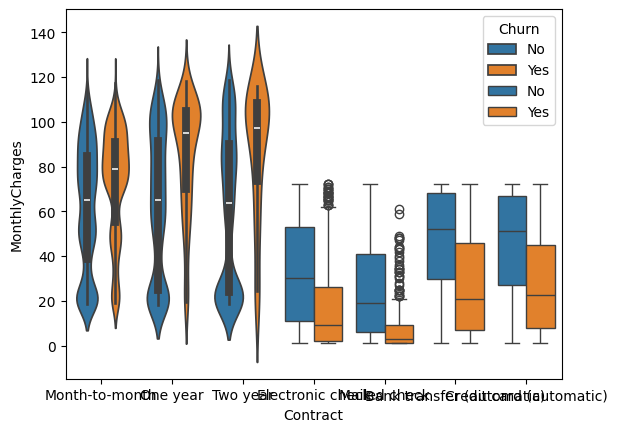

In [ ]:
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
sns.boxplot(x='PaymentMethod', y='tenure', hue='Churn', data=df)
plt.show()


In [ ]:
print(df['Churn'].value_counts())
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


Churn
No     5163
Yes    1869
Name: count, dtype: int64


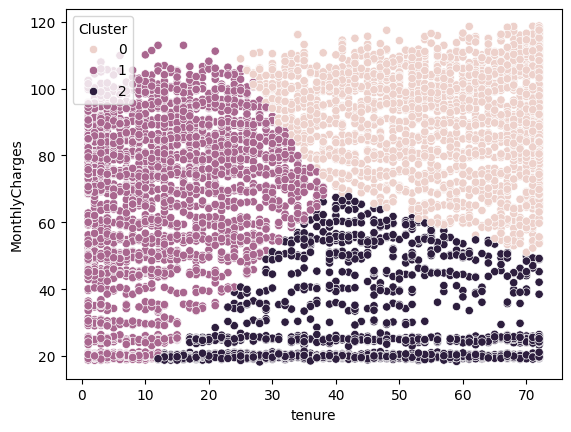

In [ ]:
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=df)
plt.show()


In [ ]:
# Encode all object or category columns (including 'tenure_group')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


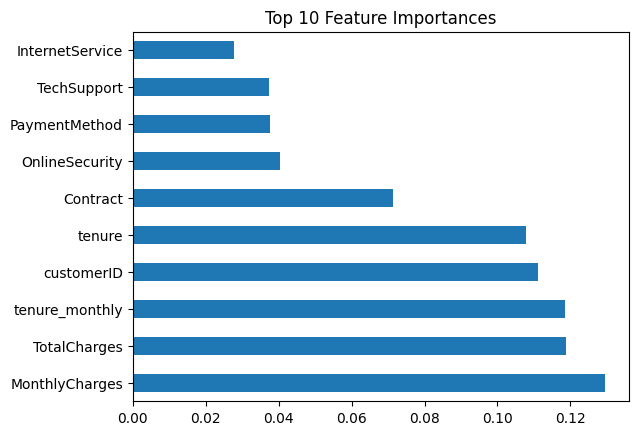

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Drop Churn and make a copy
X = df.drop(['Churn'], axis=1).copy()
y = df['Churn']

# Drop tenure_group (optional: it's already represented by 'tenure')
if 'tenure_group' in X.columns:
    X = X.drop('tenure_group', axis=1)

# Encode all object columns
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))  # convert to string and encode

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

# Print classification report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    churn_trend = df.resample('M')['Churn'].mean()
    churn_trend.plot(title='Monthly Churn Rate')
    plt.show()


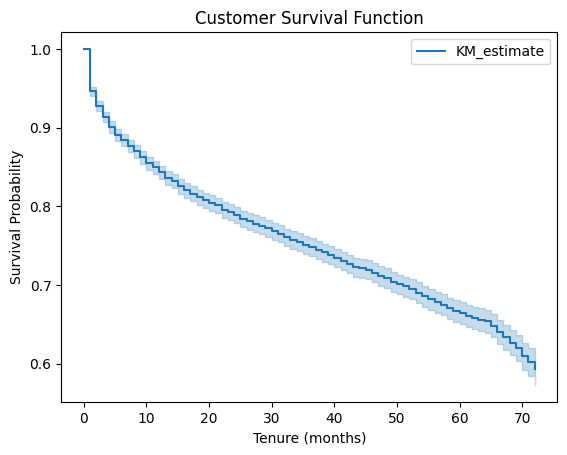

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['tenure'], event_observed=df['Churn'])
kmf.plot_survival_function()
plt.title('Customer Survival Function')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability')
plt.show()


In [ ]:
df.to_csv("churn_analysis_output.csv", index=False)
